In [ ]:
import os
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [ ]:
frames_dir = "examples/evacuation/lib/grid_iterations"

## Read grid iterations

In [128]:
"""each file is expected to contain numbers separated by space:
 - first 2 numbers are x and y dimension, respectively
 - next are x * y * 9, where each consecutive 9 numbers describe state of single cell (object and directions) """


def read_grids(frames_dir):
    """ returns numpy array of shape (n_frames, x, y, 9)"""
    x_size, y_size = 0, 0
    n_frames = len(os.listdir(frames_dir))

    frames_3d = [0 for x in range(n_frames)]
    print(f"found {n_frames} files")
    for filename in os.listdir(frames_dir):
        frame_nr = int(filename.split("_")[1].split(".")[0]) - 1
        path = os.path.join(frames_dir, filename)
        with open(path, 'r') as f:
            file = f.read()
        file_int = [int(c) for c in file.split(" ")]
        [x_size, y_size] = file_int[:2]
        grid = file_int[2:]
        grid = np.array(grid).reshape((x_size,y_size,9))
        frames_3d[frame_nr] = (grid)
    frames_3d = np.array(frames_3d)
    print(f"grid shape: {x_size} x {y_size}")    
    return frames_3d

frames_3d = read_grids(frames_dir)

found 25 files
grid shape: 4 x 6


## Translate 3d data into 2d frames

In [129]:
def translate_to_2d_frames(frames_3d):
    objects = frames_3d[:, :, :, 0]
    signals = frames_3d[:,:,:, 1:]
    signals_sum = np.sum(signals, axis=3)
    max_signal = np.amax(signals)
    frames_2d = objects*max_signal*2+signals_sum
    return frames_2d

frames = translate_to_2d_frames(frames_3d)

## Create and save animation

<IPython.core.display.Javascript object>


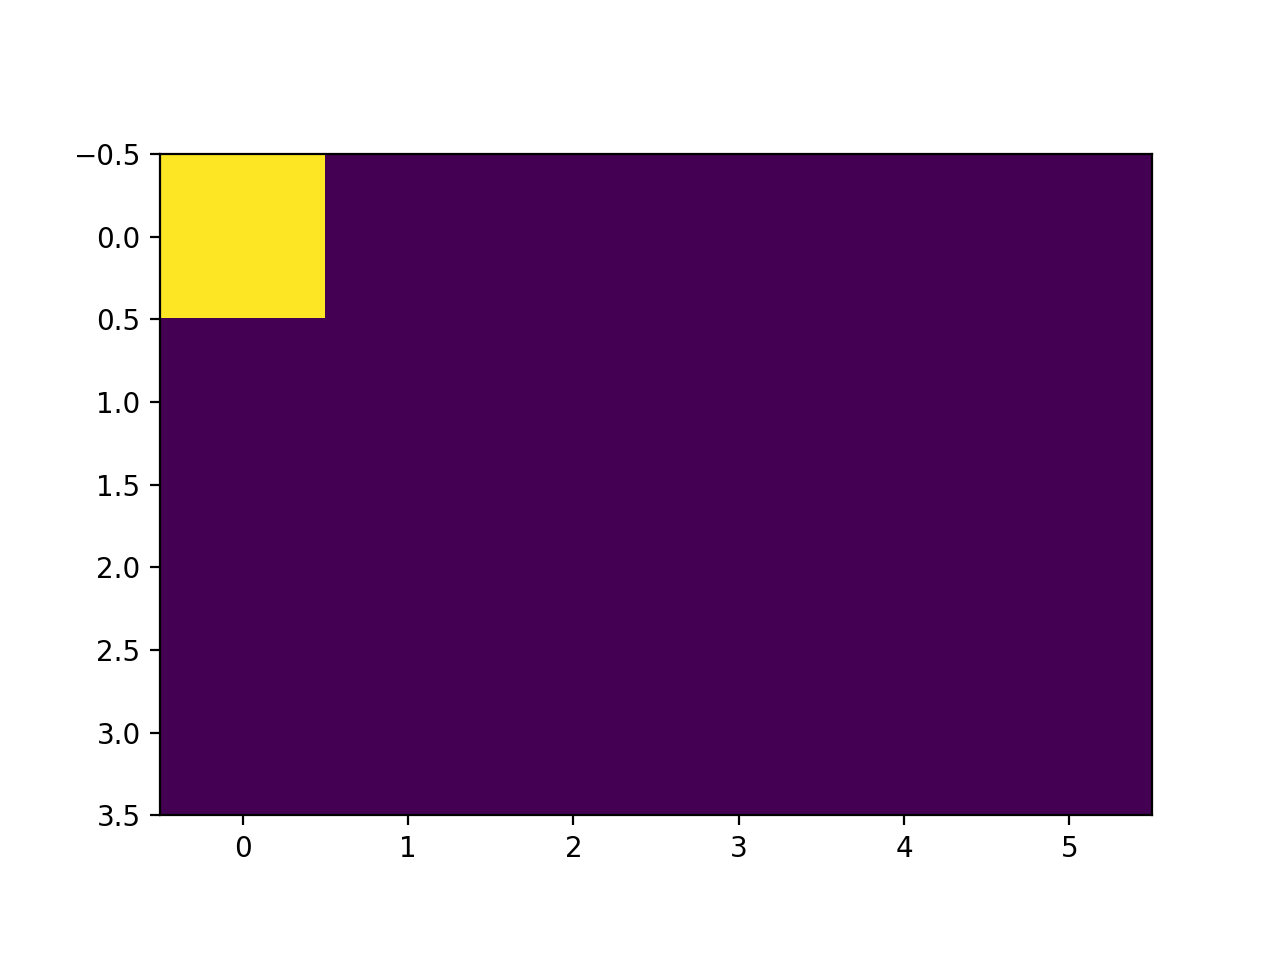

In [135]:
%matplotlib notebook


fig, ax = plt.subplots()

ims = []
for i in range(len(frames)):
    im = ax.imshow(frames[i], animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=500, blit=True,
                                repeat_delay=1000)

ani.save("movie.mp4")
plt.show()

In [45]:
# mock frames - skip unless testing
frames_3d = [
    [
        [[1,2, 2],[3,4, 4]],
        [[5,6, 6], [7,8, 8]]
    ], 
    
    [
        [[10,20, 20],[30,40, 40]],
        [[50,60, 60], [70,80, 80]]
    ], 
            ]
frames_3d = np.array(frames_3d)